<a href="https://colab.research.google.com/github/B3CODER/Time_forecasting/blob/main/Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM


In [ ]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [ ]:
df = df.loc[7837:10351]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
7837,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765109,271269600
7838,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898556,318292800
7839,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878093,394024400
7840,2012-01-10,15.211071,15.214286,15.053571,15.115714,12.924206,258196400
7841,2012-01-11,15.095714,15.101786,14.975357,15.091071,12.903135,215084800


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10347,2021-12-27,177.089996,180.419998,177.070007,180.330002,179.836319,74919600
10348,2021-12-28,180.160004,181.330002,178.529999,179.289993,178.799149,79144300
10349,2021-12-29,179.330002,180.630005,178.139999,179.380005,178.888916,62348900
10350,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.712143,59773000
10351,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.083878,64062300


In [ ]:
df.shape

(2515, 7)

In [ ]:
df.set_index('Date' , inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765109,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878093,394024400
2012-01-10,15.211071,15.214286,15.053571,15.115714,12.924206,258196400
2012-01-11,15.095714,15.101786,14.975357,15.091071,12.903135,215084800
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.836319,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.799149,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.888916,62348900


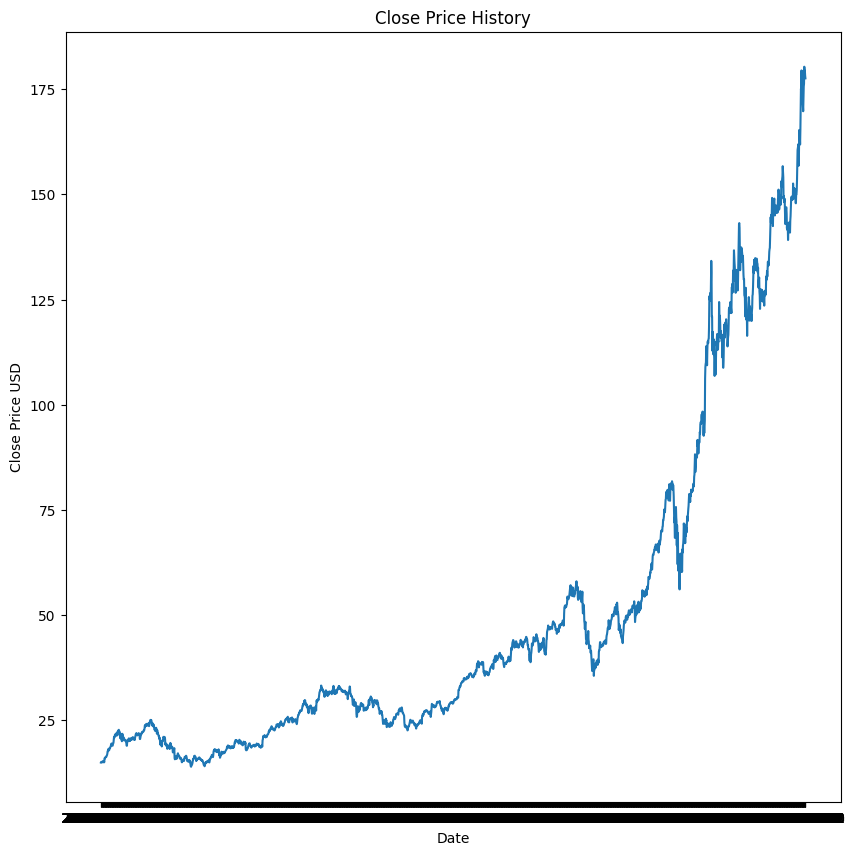

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

In [ ]:
import math
data =df.filter(['Close'])
dataset =data.values
training_data_len =math.ceil( len(dataset)* 0.8)
training_data_len


2012

In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00590292],
       [0.00684095],
       [0.00669713],
       ...,
       [0.99429028],
       [0.98719814],
       [0.98341175]])

In [ ]:
train_dataset = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]

for i in range(60 , len(train_dataset)):
  x_train.append(train_dataset[i-60:i,0])
  y_train.append(train_dataset[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
    


[array([0.00590292, 0.00684095, 0.00669713, 0.00702126, 0.00687314,
       0.00662415, 0.006285  , 0.00733465, 0.00828126, 0.00798934,
       0.00639018, 0.00791636, 0.00641379, 0.0120484 , 0.01161266,
       0.01218149, 0.01341143, 0.01415627, 0.01409403, 0.01386435,
       0.01484317, 0.01576401, 0.01680723, 0.01849225, 0.02203185,
       0.02208551, 0.02405602, 0.02552853, 0.02299779, 0.0239723 ,
       0.02395299, 0.0266855 , 0.02629698, 0.02701606, 0.02830826,
       0.02902735, 0.03109874, 0.03260773, 0.03304347, 0.03319589,
       0.03061578, 0.02999328, 0.03008559, 0.03251115, 0.03319374,
       0.03465982, 0.0381157 , 0.04272642, 0.04186352, 0.04186566,
       0.04519921, 0.04624242, 0.04549972, 0.04482143, 0.04411522,
       0.04646135, 0.04807125, 0.04874526, 0.04707955, 0.0448665 ])]
[0.04896205371403779]

[array([0.00590292, 0.00684095, 0.00669713, 0.00702126, 0.00687314,
       0.00662415, 0.006285  , 0.00733465, 0.00828126, 0.00798934,
       0.00639018, 0.00791636, 0.00

In [ ]:
# convert train dataset to numpy arrays
x_train ,y_train = np.array(x_train) , np.array(y_train)


In [ ]:
# reshape the data for lstm
x_train.shape

(1952, 60)

In [ ]:
# x_train = np.reshape(x_train,(1952 ,60 ,1))
x_train = np.reshape(x_train,(x_train.shape[0] , x_train.shape[1],1))
x_train.shape

(1952, 60, 1)

In [ ]:
# Build LSTM Model
model=Sequential()
model.add(LSTM(50 , return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50 , return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam' , loss='mean_squared_error')

In [ ]:
model.fit(x_train ,y_train , batch_size =1 , epochs=1)

1952/1952 [==============================] - 75s 36ms/step - loss: 1.7534e-04


In [ ]:
test_dataset = scaled_data[training_data_len-60: , :]
x_test=[]
y_test = dataset[training_data_len: ,:]
for i in range(60,len(test_dataset)):
  x_test.append(test_dataset[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1] ,1))
x_test.shape

(503, 60, 1)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



16/16 [==============================] - 1s 21ms/step


In [ ]:
# model Evaluation
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

13.63503268026729

<ipython-input-46-50f50a166aca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] =predictions


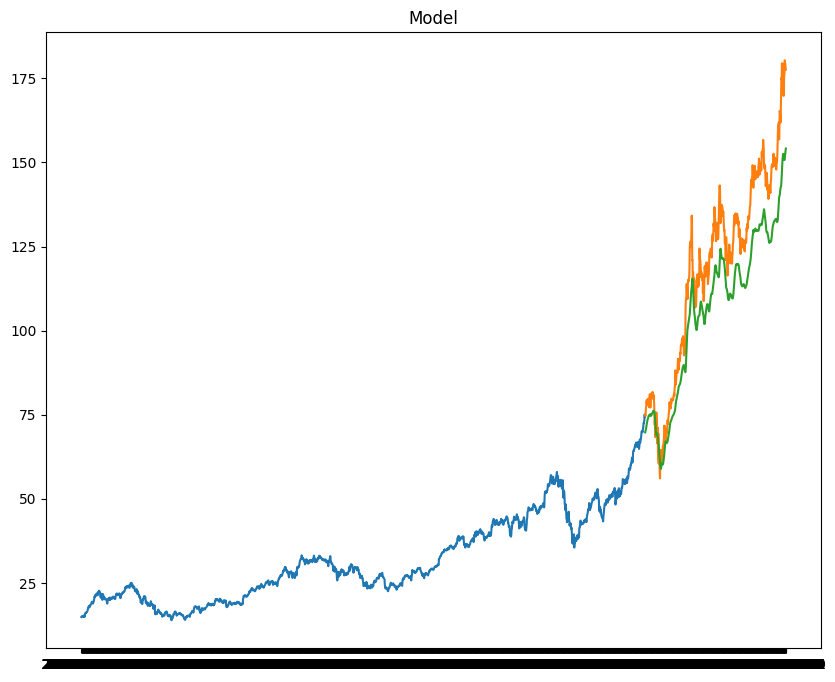

In [ ]:
train =data[: training_data_len]
valid =data[training_data_len:]
valid['Predictions'] =predictions
plt.figure(figsize=(10,8))
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])

plt.title("Model")
plt.show()